In [1]:
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
PATH = "../../"

In [3]:
categories = [
    {"id": 0, "name": "bird"},
    {"id": 1, "name": "cow"},
    {"id": 2, "name": "domestic dog"},
    {"id": 3, "name": "egyptian mongoose"},
    {"id": 4, "name": "european badger"},
    {"id": 5, "name": "european rabbit"},
    {"id": 6, "name": "fallow deer"},
    {"id": 7, "name": "genet"},
    {"id": 8, "name": "horse"},
    {"id": 9, "name": "human"},
    {"id": 10, "name": "iberian hare"},
    {"id": 11, "name": "iberian lynx"},
    {"id": 12, "name": "red deer"},
    {"id": 13, "name": "red fox"},
    {"id": 14, "name": "wild boar"},
]

In [4]:
# Variables
THRESHOLD = 0.4

In [5]:
# Cargar el archivo JSON de predicciones
with open(PATH + 'runs/detect/val4/predictions.json', 'r') as json_file:
    predictions = json.load(json_file)

# Cargar el archivo de rutas de imágenes
with open(PATH + 'Dataset/test.txt', 'r') as txt_file:
    image_paths = txt_file.readlines()
    image_paths = [path.strip() for path in image_paths]

In [6]:
def denormalize_bbox(bbox, image_width, image_height):
    x_center, y_center, width, height = bbox
    x_min = int((x_center - width / 2) * image_width)
    y_min = int((y_center - height / 2) * image_height)
    x_max = int((x_center + width / 2) * image_width)
    y_max = int((y_center + height / 2) * image_height)
    return x_min, y_min, x_max, y_max

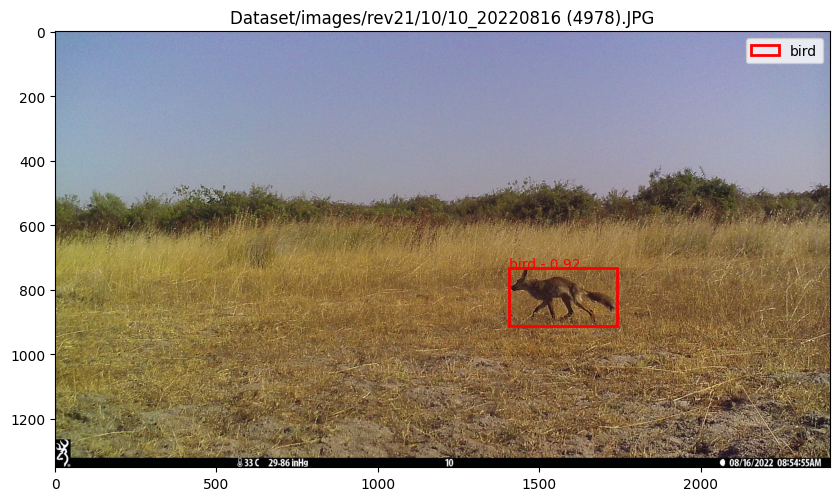

In [18]:
# Escoger una imagen aleatoria
random_image_path = random.choice(image_paths)
image_id = random_image_path.split('/')[-1].replace('.JPG', '')

# Filtrar las predicciones para la imagen seleccionada y con score > THRESHOLD
filtered_predictions = [pred for pred in predictions if pred['image_id'] == image_id and pred['score'] > THRESHOLD]

# Mostrar la imagen y sus bounding boxes
fig, ax = plt.subplots(figsize=(10, 8))
img = plt.imread(PATH + random_image_path)
ax.imshow(img)

# Título de la imagen con el path completo
plt.title(random_image_path, fontsize=12)

for pred in filtered_predictions:
    category_id = pred['category_id']
    category_name = categories[category_id]['name']
    bbox = pred['bbox']
    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3],
        linewidth=2, edgecolor='r', facecolor='none', label=category_name
    )
    ax.add_patch(rect)
    ax.annotate(f"{category_name} - {pred['score']:.2f}", (bbox[0], bbox[1]), color='r')

plt.legend()
plt.show()